# Derivatives, Partial Derivatives and Gradient Descent

## Learning Objectives

By the end of this session you should be able to...

1. Compute the derivative of a function of one variable
2. Compute the partial derivatives of a function of many variables 
3. Use the method of gradient descent to find the minimum of a function of one variable

## Motivation: Why are derivatives, partial derivatives and the method of gradient descent important? What do these things have to do with Data Science?
Derivatives and partial derivatives are used to implement the method of gradient descent. <br>
Gradient Descent is 
* A method for finding the minimum of a function 
* Used to train logistic regression and other models in machine learning
* The key to training deep learning models, i.e. neural networks.


## 1. Introduction to Derivatives

The process of finding a derivative is called **Differentiation**, which is a technique used to calculate the *slope* of the *tangent line* of a function $y = f(x)$ at any point $x$. The derivative tells us how rapidly, and in what direction $y$ changes with respect to $x$

### 1A. Activity - Derivative Tutorial:

1. Go through this [Derivative tutorial from Math Is Fun](https://www.mathsisfun.com/calculus/derivatives-introduction.html) (15 min)
1. When you're done, talk with a partner about topics you still have questions on. See if you can answer each other's questions. (5 min)
1. We'll then go over questions on the tutorial as a class (10 min)

### 1B. Review Diagram

Review the below diagram as a class, and compare with what you just learned in the above `Derivative Tutorial`.

<img src="diff_y_x2.png" width="1200" height="1200">
<img src="diff_y_x2_gragh.png" width="1200" height="1200">

## 2. The Derivative Formula

$f^\prime(x) \equiv \frac{d}{dx}f(x) \equiv \frac{\Delta y}{\Delta x}  = \frac{f(x + \Delta x) - f(x)}{\Delta x}$

The symbol $\equiv$ is read as "is defined as".

The above formula is meant to be evaluated in the limit as $\Delta x$ approaches 0. <br>
So we should choose a very small number for $\Delta x$, say 1.e-10

### 2A. Activity: Write a Python function to compute the gradient of any one-dimensional function

* NOTE: foe one dimensional function, the *gradient* is the same thing as the *derivative*<br>
* Use the derivative formula, above <br>
* Use your function to evaluate the gradient of $f(x)=x^2$at $x = 3$ and $x = -2$ 

In [1]:
# define function we want to compute the gradient of
def f(x):
    return x**2

# function that computes the gradient of a one dimensional function, evaluated at a given position
def gradient(func,x):
    '''Inputs: 
            func, the function to take the derivative of
            x, the position (value of x) where the derivative is to be evaluated
        Output:
            the gradient of func(x) evaluated at position x
       
    '''
    delta_x = 1e-6
    return (f(x + delta_x) - f(x)) / delta_x

x = 3
print(f'Gradient at x = {x} is {gradient(func=f,x=x):.3}')
x = -2
print(f'Gradient at x = {x} is {gradient(func=f,x=x):.3}')

Gradient at x = 3 is 6.0
Gradient at x = -2 is -4.0


Note that these values match the derivative that we compute from the calculus formula $\frac{d}{dx}x^n = nx^{n-1}$, 
which is $\frac{d}{dx}x^2 = 2x^{2-1} = 2x^1 = 2x$ 

$2*3 = 6$

$2 * -2 = -4$

### 2B. Table of Derivatives of Common Functions

Computing derivatives of more complicated functions than $x^n$ is a source of much toil and busy work (not necessarily a bad thing) in introductory calculus classes. But now that you understand what a derivative is, it's not cheating to take a shortcut! The second page of this PDF lists formulas for derivatives of common functions. The first page summarizes the rules for computing derivatives. Utilize as a resource going forward!

- https://www.qc.edu.hk/math/Resource/AL/Derivative%20Table.pdf

## 3. Partial Derivatives of Functions of Two or More Variables

Now we know how to calculate a derivative for a function of one variable. But what if we have a function of $N$ variables where $N>1$?

We calculate the *partial derivatives* of the function.
Calculating the partial derivatives for a function of $N$ variables consists of calculating $N$ ordinary derivatives: one for each variable, where the other variables are held constant.

### 3A. Activity - Partial Derivative Video

Let's watch this video introduction to Partial Derivatives from **Khan Academy**: https://youtu.be/AXqhWeUEtQU

**Note:** Here are some derivative shortcuts that will help in the video:

$\frac{d}{dx}x^2 = 2x$

$\frac{d}{x}sin(x) = cos(x)$

$\frac{d}{dx}x = 1$



### 3B. The Symbolic Python library `sympy` computes derivatives and partial derivatives of functions
You can install this library from the command line via `conda install sympy` in an Anaconda shell.

In [2]:
from sympy import symbols, diff
# initialize x and y to be symbols to use in a function
x, y = symbols('x y', real=True)
f = (x**2)/y
# Find the partial derivatives of x and y
partial_fx = diff(f, x, evaluate=True) # partial derivative of f(x,y) with respect to x
partial_fy = diff(f, y, evaluate=True) # partial derivative of f(x,y) with respect to y
print(f'The partial derivative of f(x,y) w.r.t. (with respect to) x is {partial_fx}')
print(f'The partial derivative of f(x,y) w.r.t. x is {partial_fy}')
print(f'The partial derivative of f(x,y) w.r.t. x evaluated at the point (2,1) is {partial_fx.evalf(subs={x: 2, y: 1}):.2}')
print(f'The partial derivative of f(x,y) w.r.t. y evaluated at the point (2,1) is {partial_fy.evalf(subs={x: 2, y: 1}):.2}')

The partial derivative of f(x,y) w.r.t. (with respect to) x is 2*x/y
The partial derivative of f(x,y) w.r.t. x is -x**2/y**2
The partial derivative of f(x,y) w.r.t. x evaluated at the point (2,1) is 4.0
The partial derivative of f(x,y) w.r.t. y evaluated at the point (2,1) is -4.0


## 4. Calculating a Function's Partial Derivatives and Gradient

### 4A. Example: calculate the partial derivatives for a function of two variables

In [3]:
def f(x, y):
    return x**2/y

eps = 1e-6
x = 2
y = 1
print((f(x + eps, y) - f(x, y)) / eps)
print((f(x, y + eps) - f(x, y)) / eps)

4.0000010006480125
-3.9999959997594203


Looks about right! This works rather well, but it is just an approximation. Also, you need to call `f()` at least once per parameter (not twice, since we could compute `f(x, y)` just once). This makes this approach difficult to control for large systems (for example neural networks).

### 4B. Activity: compute the gradient of a function of two variables 
Write a Python function that computes the *gradient* of any *two-dimensional* function $f(x,y)$ by **completing the code in the block below**

* The *gradient* of a function is the vector composed of all the function's *partial derivatives*<br>
* The gradient operation is denoted by the *nabla* symbol $\nabla$ 
* The *gradient* of a two-dimensional function is thus
    $\nabla f(x,y) = \left(\frac {\partial{f(x,y)}}{\partial{x}}, \frac{\partial{f(x,y)}}{\partial{y}}\right)$
* Your `gradient()` function should calculate partial derivatives using the derivative formula from section **2**<br>
* Use your `gradient()` function to evaluate the gradient of the function $f(x, y) = \frac{x^2}{y}$ at the point $(2,1)$

In [4]:
# define the 2-dimensional function for which you want to compute the gradient
def f_xy(x,y):
    # your code here
    return

# function to compute gradient of any two-dimensional function
def gradient(func, x, y):
    '''
    inputs: 
        func: a continuous function of two variables
        x, y: the values of the two variables at the point 
            where the gradient is to be computed
    outputs:
        partial_x, partial_y: the partial derivatives of the input function, 
            evaluated at specified point (x,y)
        
    '''
    delta = 1.e-10
    partial_x = None # your code here
    partial_y = None # your code here
    
    return partial_x, partial_y

# output
print(f'The gradient of f(x,y) = x**2/y at the point (2,1) is {gradient(func=f_xy, x=2, y=1)}')

The gradient of f(x,y) = x**2/y at the point (2,1) is (None, None)


## 5. The Heart of the Matter: the Method of Gradient Descent

In many machine learning and deep learning applications, we need to find the minimum of a "cost function" (sometimes also called an "error function" or a "loss function").
Whatever we want to call it, the cost function measures the error of a model on some training data when we compare the predicted *targets* against the true *targets*.

The *targets* are what the model is trying to predict. Examples are **numbers** -- like housing prices, or **class labels** -- like "dog", "cat" or "mouse") 

Why do we want to find the minimum for a cost function? Given that a cost function measures how wrong our model is, we want to minimize that error!

In Machine Learning cost functions measure how badly our models are performing. We want to adjust the parameters of the model (also known as **weights**) to minimize our cost function, therefore minimizing error of the model!

We find find the optimal weights that minimize the cost function by using the **Method of Gradient Descent**. The Method of Gradient Descent repeatedly makes small adjustments to the weights that make the cost function smaller, until the cost function reaches a minimum. We'll learn more about models in future lessons, but for now, let's review the Gradient Descent process with the below images, given a cost function $J(w_0,w_1)$ that is a function of weights $w_0$ and $w_1$:

<img src="gradient_descent.png" width="2000" height="2000">

Look at that bottom right image above. Looks like we're using partial derivatives to determine the optimal values of the weights $w_0$ and $w_1$ that minimize the cost function $J(w_0,w_1)$. And we know exactly how to do that!

### 5A. Finding the minimum of a function via Gradient Descent

Assume we want to minimize the function $J$ which has two weights $w_0$ and $w_1$

We have two options to find the minimum of $J(w_0, w_1)$:

1. Take partial derivatives of $J(w_0, w_1)$ with relation to $w_0$ and $w_1$:

$\frac{\partial J(w_0, w_1)}{\partial w_0}$

$\frac{\partial J(w_0, w_1)}{\partial w_1}$

And find the appropriate weights such that the partial derivatives equal 0:

$\frac{\partial J(w_0, w_1)}{\partial w_0} = 0$

$\frac{\partial J(w_0, w_1)}{\partial w_1} = 0$

In this approach we would solve the resulting system of linear or non-linear equations.

2. Use the Gradient Descent algorithm:

First we need to define three things:

- Arbitrary random initial values for $w_0$ and $w_1$.
- A step-size alpha ($\alpha$) -- also called the *learning rate*, a small number like $1.e-5$
- A *threshold* for the weight updates

Next we search for the optimal values of the weights $w_0$ and $w_1$ by using a loop to repeatedly update the weights until we minimize the cost function. We terminate the loop when the weight updates become negligibly small, i.e. below the threshold that we set. For example, if we adopt a threshold of 0.0001 and the weight updates -- the changes in the weight parameters from one iteration to the next -- are both less than 0.0001, then we stop the loop and declare victory, i.e. that we have found optimal values of the weights that (approximately) minimize the loss function!

Let's review some pseudocode for how to implement this algorithm:

```
# initialization
initialize the following:
    - starting weight values -- an initial guess, could be random
    - the learning rate (alpha), a small positive number (we'll choose 1.e-5)
    - the current weight update -- initialize to 1
    - the threshold -- set this to 1.e-4

# weight update loop
while the weight update is greater than the threshold:
    adjust the weights by adding the weight updates based on the algorithm
    
# return the final values of the weights
```

How do we compute the `weight updates based on the algorithm`?
The updates are the second term on the right hand side of the equations below: they are proportional to the partial derivatives and in the opposite direction.
    
$w_0 = w_0 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_0}$
        
$w_1 = w_1 - \alpha \frac{\partial J(w_0, w_1)}{\partial w_1}$

### 5B. Gradient descent in one dimension

#### Let's define an interesting function of one variable to minimize: <br> 
$f(x) = \frac{x^4}{50} - 2x^2 + x + 1$
#### We can compute the derivative of this function using the formula from calculus <br>
$\frac{d}{dx}(x^n) = nx^{n-1}$ <br>

So that <br>
$f^{'}(x) = \frac{4}{50}x^3 - 4x + 1$ 

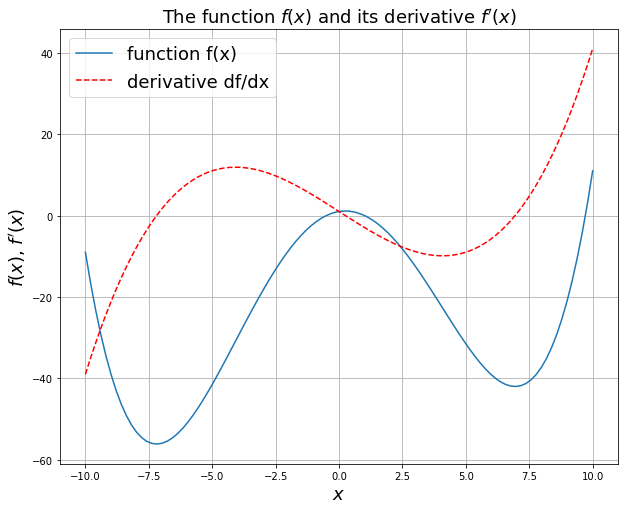

In [5]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
eps = 1.e-10

# define an interesting function to minimize
x = np.linspace(-10,10, 100)
fx =lambda x: (1/50)*x**4 - 2*x**2 + x + 1

# compute derivative of x by applying the calculus formula d/dx(x**n) = n*x**(n-1)
df_dx = lambda x: (4/50)*x**3 - 4*x + 1

# plot the function, and its derivative
plt.figure(figsize=(10,8))
plt.plot(x,fx(x),label = 'function f(x)')
plt.plot(x,df_dx(x),'r--',label = 'derivative df/dx')
plt.xlabel('$x$',FontSize=18)
plt.ylabel('$f(x)$, $f\'(x)$',FontSize=18)
plt.title('The function $f(x)$ and its derivative $f\'(x)$', FontSize=18)

plt.legend(prop={'size': 18})
plt.grid()

#### Recall our `gradient()` function from section 2, above

In [6]:
def gradient(func,x):
    delta_x = 1.e-10
    return (func(x + delta_x) - func(x))/delta_x

In [7]:
# test the `gradient` code by choosing a few x values 
#     and see if the answers make sense
x = -10
print(f'The gradient of f(x) at x = {x} is {gradient(func=fx,x=-10):.3}')

The gradient of f(x) at x = -10 is -39.0


####  Write a `gradient descent` function for a function of one variable
Follow the pseudo-code in section **5A** 

In [8]:
def gradient_descent(func,x_init):
    
    '''
    Inputs:
        func: a function of one variable
        x_init: the starting value of the variable
    Outputs: 
        x: the value of the variable at which func reached a minimum
        n_iter: the number of iterations of the weight update loop 
            before it was terminated
        x_values: the list of updated weights
        '''
    
    # Initialize
    alpha = 1.e-4
    threshold = 1.e-4
    delta_x = 1.
    x = x_init
    n_iter = 0
    x_values = []
    
    # run the weight update loop until it terminates
    while np.abs(delta_x) > threshold: #and n_iter < max_iter:
        
        # compute the derivative of the function
        df_dx = gradient(func,x)
        # compute the weight update
        delta_x = -alpha*df_dx
        # apply the weight update
        x = x + delta_x
        # append to the running list of updated weights
        x_values.append(x)
        # increment the iteration count
        n_iter+=1
        
    return x, n_iter, x_values 

#### Minimize the function $f(x) = \frac{x^4}{50} - 2x^2 + x + 1$
Choose an initial value for $x$ <br>
Then run your `gradient_descent` code to to find the value of $x$ that minimizes the function.

In [9]:
# choose a starting point -- could be random
# np.random.seed(42)
# x_init = np.random.uniform(-10,10,1) 
x_init = 2.5
x_star, n_iter, x_values = gradient_descent(func=fx,x_init=x_init) 
print(f'Starting at the point x = {x_init}, \n    \
we found that the function reaches a minimum at x_star = \
{x_star:.3} \n    after {n_iter} iterations')

Starting at the point x = 2.5, 
    we found that the function reaches a minimum at x_star = 6.81 
    after 6853 iterations


#### Check that the derivative is reasonably close to zero when evaluated at the `x_star` found by your `gradient_descent` function
Remember that the derivative ranges between $[-40,+40]$ according to the above graph.

In [10]:
# derivative, from calculus formula
print(f'Derivative from the calculus formula is {df_dx(x_star)}')

# derivative, from definition
print(f'Derivative from the definition is  {gradient(func=fx,x=x_star)}')

Derivative from the calculus formula is -0.9987282580894323
Derivative from the definition is  -0.9987388693843968


#### Visualize how gradient descent finds the minimum of the function

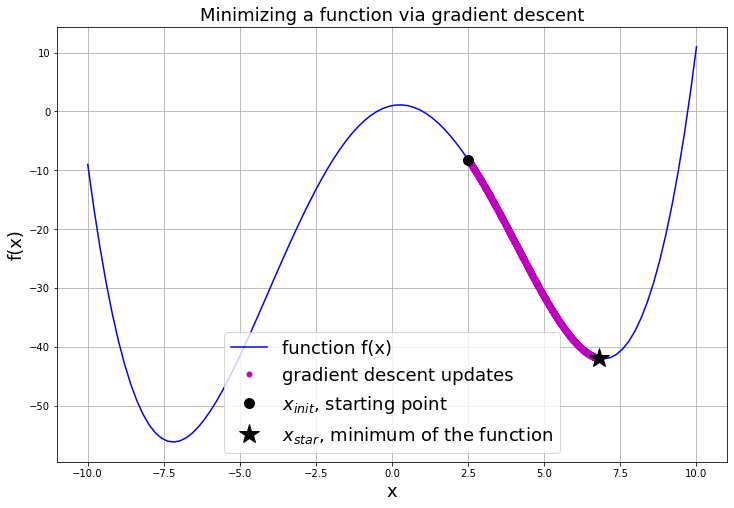

In [11]:
x_values = np.array(x_values)
x = np.linspace(-10,10, 100)

plt.figure(figsize=(12,8))
plt.plot(x,fx(x),'b-',label = 'function f(x)')
plt.plot(np.array(x_values),fx(x_values),'m.',markersize = 10, label='gradient descent updates')
plt.plot(x_init,fx(x_init),'k.',markersize = 20, label = '$x_{init}$, starting point')
plt.plot(x_star,fx(x_star),'k*',markersize = 20, label = '$x_{star}$, minimum of the function',)
plt.xlabel('x',FontSize = 18)
plt.ylabel('f(x)',FontSize = 18)
plt.title('Minimizing a function via gradient descent',FontSize = 18)
plt.grid()
plt.legend(loc='best',prop={'size': 18});

### 5C. Activity: 
In the above section, our `gradient_descent()` function required almost 7000 iterations (steps) to find the minimum of the input function.
See if you can tune the value(s) of the *hyperparameters* $alpha$ and $threshhold$ in the `gradient_descent()` code to get reasonably close to the same answer(s) in fewer than 700 steps.

## Resources

- [Derivative tutorial from Math Is Fun](https://www.mathsisfun.com/calculus/derivatives-introduction.html) 
- [Derivative Table](https://www.qc.edu.hk/math/Resource/AL/Derivative%20Table.pdf)
- [Khan Academy - Partial Derivatives video](https://www.youtube.com/watch?v=AXqhWeUEtQU&feature=youtu.be)
- [Towards Data Science - Machine Learning Fundamentals: cost functions and gradient Descent](https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220)